In [94]:
import pickle
import pandas as pd

file_paths = [
    'data_2019.pkl', 
    'data_2020.pkl', 
    'data_2021.pkl', 
    'data_2022.pkl', 
    'data_2023.pkl', 
    'data_2024.pkl'
]


combined_data = pd.DataFrame()
for file_path in file_paths:
    try:
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
            combined_data = pd.concat([combined_data, data])
    except FileNotFoundError:
        print(f"File not found: {file_path}")

# Get the unique set of symbols
unique_symbols = set(combined_data['symbol'])
print(unique_symbols)
print(len(unique_symbols))
#HMUZ


{'NQZ3', 'NQU3-NQH4', 'NQH1-NQM1', 'NQM2-NQZ2', 'NQZ1-NQH2', 'NQU2', 'NQZ3-NQU4', 'NQM4', 'NQH9-NQZ9', 'NQU1-NQZ1', 'NQH2-NQZ2', 'NQM3-NQZ3', 'NQU9-NQH0', 'NQU3', 'NQM4-NQH5', 'NQH4-NQM4', 'NQH3-NQM3', 'NQH4', 'NQM2-NQU2', 'NQH2-NQU2', 'NQM0', 'NQH0-NQH1', 'NQU9-NQM0', 'NQZ4', 'NQU2-NQH3', 'NQU0-NQZ0', 'NQH2-NQM2', 'NQU3-NQZ3', 'NQZ0-NQM1', 'NQU1-NQM2', 'NQZ3-NQH4', 'NQH0', 'NQM1', 'NQU1-NQH2', 'NQZ2-NQH3', 'NQH9', 'NQM0-NQH1', 'NQU4', 'NQM4-NQU4', 'NQH1', 'NQM9-NQU9', 'NQZ1-NQU2', 'NQH3-NQZ3', 'NQU2-NQZ2', 'NQU0-NQH1', 'NQH0-NQM0', 'NQH1-NQZ1', 'NQU0', 'NQZ9-NQU0', 'NQM0-NQZ0', 'NQU1', 'NQZ6', 'NQM9-NQH0', 'NQU9', 'NQM3-NQU3', 'NQM4-NQZ4', 'NQM9', 'NQH1-NQU1', 'NQH9-NQM9', 'NQM3', 'NQM0-NQU0', 'NQU9-NQZ9', 'NQU4-NQZ4', 'NQM1-NQZ1', 'NQH3-NQU3', 'NQH0-NQZ0', 'NQM1-NQU1', 'NQZ9-NQM0', 'NQH4-NQU4', 'NQZ3-NQM4', 'NQH9-NQU9', 'NQZ0', 'NQZ9', 'NQZ1-NQZ2', 'NQZ3-NQZ4', 'NQM9-NQZ9', 'NQZ1', 'NQZ2', 'NQZ2-NQM3', 'NQH3', 'NQZ0-NQH1', 'NQH2', 'NQM2', 'NQZ1-NQM2', 'NQH0-NQU0', 'NQZ9-NQH0', 'NQH5'

In [97]:
#filtering the symbols to sort accordingly to years and month code

months_order = 'HMUZ'
valid_years = ['9', '0', '1', '2', '3', '4']


filtered_symbols = []

for symbol in unique_symbols:
    if '-' not in symbol:  
        if len(symbol) == 4:  
            month = symbol[2]
            year = symbol[3]
            if month in months_order and year in valid_years:
                filtered_symbols.append(symbol)

filtered_symbols.sort(key=lambda x: (valid_years.index(x[3]), months_order.index(x[2])))


print(filtered_symbols)


['NQH9', 'NQM9', 'NQU9', 'NQZ9', 'NQH0', 'NQM0', 'NQU0', 'NQZ0', 'NQH1', 'NQM1', 'NQU1', 'NQZ1', 'NQH2', 'NQM2', 'NQU2', 'NQZ2', 'NQH3', 'NQM3', 'NQU3', 'NQZ3', 'NQH4', 'NQM4', 'NQU4', 'NQZ4']


In [98]:
import pickle
import pandas as pd




combined_data.index = pd.to_datetime(combined_data.index)


combined_data.index = combined_data.index.tz_convert('UTC').tz_convert('America/New_York')


filtered_data = {symbol: combined_data[combined_data['symbol'] == symbol].sort_index() for symbol in filtered_symbols}

def find_first_entry_with_consecutive_volume(data, volume_threshold, consecutive_entries):
    for i in range(consecutive_entries, len(data)):
        if all(data['volume'][i-consecutive_entries:i] > volume_threshold):
            return data.index[i]
    return None

def find_last_entry_with_consecutive_volume(data, volume_threshold, consecutive_entries):
    for i in range(len(data) - consecutive_entries - 1, -1, -1):
        if all(data['volume'][i+1:i+consecutive_entries+1] > volume_threshold):
            return data.index[i]
    return None




for symbol, df in filtered_data.items():

    first_valid_index = find_first_entry_with_consecutive_volume(df, 10, 10)
    if first_valid_index is not None:
        df = df.loc[first_valid_index:]
    

    last_valid_index = find_last_entry_with_consecutive_volume(df, 10, 10)
    if last_valid_index is not None:
        df = df.loc[:last_valid_index]
    

    df['week'] = df.index.to_period('W')
    

    filtered_data[symbol] = df
    

    print(f"{symbol} first_valid_index: ", first_valid_index)
    print(f"{symbol} last_valid_index: ", last_valid_index)
    print(f"{symbol} len_before: ", len_before)
    print(f"{symbol} len_after: ", len(df))
    print("=====================================")



/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')


NQH9 first_valid_index:  2019-01-01 18:10:00-05:00
NQH9 last_valid_index:  2019-03-14 15:55:00-04:00
NQH9 len_before:  110296
NQH9 len_after:  70128


/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')


NQM9 first_valid_index:  2019-03-07 08:57:00-05:00
NQM9 last_valid_index:  2019-06-20 15:56:00-04:00
NQM9 len_before:  110296
NQM9 len_after:  101097


/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')


NQU9 first_valid_index:  2019-06-10 10:23:00-04:00
NQU9 last_valid_index:  2019-09-19 15:56:00-04:00
NQU9 len_before:  110296
NQU9 len_after:  98040


/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')


NQZ9 first_valid_index:  2019-08-23 11:09:00-04:00
NQZ9 last_valid_index:  2019-12-19 16:00:00-05:00
NQZ9 len_before:  110296
NQZ9 len_after:  102385


/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')


NQH0 first_valid_index:  2019-12-09 09:40:00-05:00
NQH0 last_valid_index:  2020-03-20 03:49:00-04:00
NQH0 len_before:  110296
NQH0 len_after:  92921


/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')


NQM0 first_valid_index:  2020-03-03 10:10:00-05:00
NQM0 last_valid_index:  2020-06-18 15:53:00-04:00
NQM0 len_before:  110296
NQM0 len_after:  98464


/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')


NQU0 first_valid_index:  2020-06-08 09:38:00-04:00
NQU0 last_valid_index:  2020-09-17 16:01:00-04:00
NQU0 len_before:  110296
NQU0 len_after:  98218


/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')


NQZ0 first_valid_index:  2020-09-02 10:02:00-04:00
NQZ0 last_valid_index:  2020-12-17 15:55:00-05:00
NQZ0 len_before:  110296
NQZ0 len_after:  101316


/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')
/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')


NQH1 first_valid_index:  2020-12-08 07:07:00-05:00
NQH1 last_valid_index:  2021-03-18 15:59:00-04:00
NQH1 len_before:  110296
NQH1 len_after:  94729
NQM1 first_valid_index:  2020-10-12 15:33:00-04:00
NQM1 last_valid_index:  2021-06-18 08:16:00-04:00
NQM1 len_before:  110296
NQM1 len_after:  113330


/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')


NQU1 first_valid_index:  2021-06-09 09:40:00-04:00
NQU1 last_valid_index:  2021-09-16 15:58:00-04:00
NQU1 len_before:  110296
NQU1 len_after:  97449


/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')


NQZ1 first_valid_index:  2021-09-08 09:40:00-04:00
NQZ1 last_valid_index:  2021-12-16 16:05:00-05:00
NQZ1 len_before:  110296
NQZ1 len_after:  97629


/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')


NQH2 first_valid_index:  2021-12-02 09:53:00-05:00
NQH2 last_valid_index:  2022-03-17 16:04:00-04:00
NQH2 len_before:  110296
NQH2 len_after:  100300


/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')


NQM2 first_valid_index:  2022-02-24 15:41:00-05:00
NQM2 last_valid_index:  2022-06-17 08:49:00-04:00
NQM2 len_before:  110296
NQM2 len_after:  103404


/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')


NQU2 first_valid_index:  2022-05-27 08:47:00-04:00
NQU2 last_valid_index:  2022-09-15 18:02:00-04:00
NQU2 len_before:  110296
NQU2 len_after:  101634


/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')


NQZ2 first_valid_index:  2022-09-06 09:40:00-04:00
NQZ2 last_valid_index:  2022-12-15 15:57:00-05:00
NQZ2 len_before:  110296
NQZ2 len_after:  98382


/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')


NQH3 first_valid_index:  2022-11-29 11:34:00-05:00
NQH3 last_valid_index:  2023-03-16 15:55:00-04:00
NQH3 len_before:  110296
NQH3 len_after:  98947


/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')


NQM3 first_valid_index:  2023-03-07 09:32:00-05:00
NQM3 last_valid_index:  2023-06-16 09:19:00-04:00
NQM3 len_before:  110296
NQM3 len_after:  98947


/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')


NQU3 first_valid_index:  2023-06-05 09:40:00-04:00
NQU3 last_valid_index:  2023-09-14 15:55:00-04:00
NQU3 len_before:  110296
NQU3 len_after:  98231


/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')


NQZ3 first_valid_index:  2023-09-05 09:40:00-04:00
NQZ3 last_valid_index:  2023-12-15 09:19:00-05:00
NQZ3 len_before:  110296
NQZ3 len_after:  100904


/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')


NQH4 first_valid_index:  2023-11-29 09:40:00-05:00
NQH4 last_valid_index:  2024-03-15 09:19:00-04:00
NQH4 len_before:  110296
NQH4 len_after:  98210


/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')


NQM4 first_valid_index:  2024-03-05 09:40:00-05:00
NQM4 last_valid_index:  2024-06-02 19:49:00-04:00
NQM4 len_before:  110296
NQM4 len_after:  84753


/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')
/var/folders/rr/h5yhjlm12cgb4950wj6vzpmr0000gn/T/ipykernel_36766/2881417074.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df.index.to_period('W')


NQU4 first_valid_index:  None
NQU4 last_valid_index:  None
NQU4 len_before:  110296
NQU4 len_after:  14364
NQZ4 first_valid_index:  None
NQZ4 last_valid_index:  None
NQZ4 len_before:  110296
NQZ4 len_after:  772


In [99]:
import os


output_folder = 'futuresCSV'
os.makedirs(output_folder, exist_ok=True)

for symbol, df in filtered_data.items():
    csv_file_path = os.path.join(output_folder, f'{symbol}.csv')
    df.to_csv(csv_file_path)
    print(f"Saved {symbol} data to {csv_file_path}")

Saved NQH9 data to futuresCSV/NQH9.csv
Saved NQM9 data to futuresCSV/NQM9.csv
Saved NQU9 data to futuresCSV/NQU9.csv
Saved NQZ9 data to futuresCSV/NQZ9.csv
Saved NQH0 data to futuresCSV/NQH0.csv
Saved NQM0 data to futuresCSV/NQM0.csv
Saved NQU0 data to futuresCSV/NQU0.csv
Saved NQZ0 data to futuresCSV/NQZ0.csv
Saved NQH1 data to futuresCSV/NQH1.csv
Saved NQM1 data to futuresCSV/NQM1.csv
Saved NQU1 data to futuresCSV/NQU1.csv
Saved NQZ1 data to futuresCSV/NQZ1.csv
Saved NQH2 data to futuresCSV/NQH2.csv
Saved NQM2 data to futuresCSV/NQM2.csv
Saved NQU2 data to futuresCSV/NQU2.csv
Saved NQZ2 data to futuresCSV/NQZ2.csv
Saved NQH3 data to futuresCSV/NQH3.csv
Saved NQM3 data to futuresCSV/NQM3.csv
Saved NQU3 data to futuresCSV/NQU3.csv
Saved NQZ3 data to futuresCSV/NQZ3.csv
Saved NQH4 data to futuresCSV/NQH4.csv
Saved NQM4 data to futuresCSV/NQM4.csv
Saved NQU4 data to futuresCSV/NQU4.csv
Saved NQZ4 data to futuresCSV/NQZ4.csv


In [106]:
# Initialize global countertrendHL dictionary
countertrendHL = {
    "Monday": 0,
    "Tuesday": 0,
    "Wednesday": 0,
    "Thursday": 0,
    "Friday": 0,
    "Saturday": 0,
    "Sunday": 0
}

for symbol, df in filtered_data.items():
    
    week_trends = []

    for week, group in df.groupby('week'):

        highest_high_day = group[group['high'] == group['high'].max()]
        lowest_low_day = group[group['low'] == group['low'].min()]

        monday_indexes = group.index[group.index.weekday == 0]

        monday_open = group.loc[monday_indexes, 'open'].iloc[0] if not monday_indexes.empty else None
        sunday_close = group.loc[group.index.weekday == 6, 'close'].iloc[-1] if not group.loc[group.index.weekday == 6].empty else None

        if monday_open is not None and sunday_close is not None:
            trend = 'Bullish' if sunday_close > monday_open else 'Bearish'
        else:
            trend = 'Incomplete Data'

        if trend == 'Bullish':
            day_with_lowest_low = lowest_low_day.index[0].strftime('%A')
            countertrendHL[day_with_lowest_low] += 1
        elif trend == 'Bearish':
            day_with_highest_high = highest_high_day.index[0].strftime('%A')
            countertrendHL[day_with_highest_high] += 1


        week_trends.append((week, trend))




print("Global CountertrendHL:\n", countertrendHL)


Global CountertrendHL:
 {'Monday': 166, 'Tuesday': 67, 'Wednesday': 52, 'Thursday': 33, 'Friday': 15, 'Saturday': 0, 'Sunday': 0}


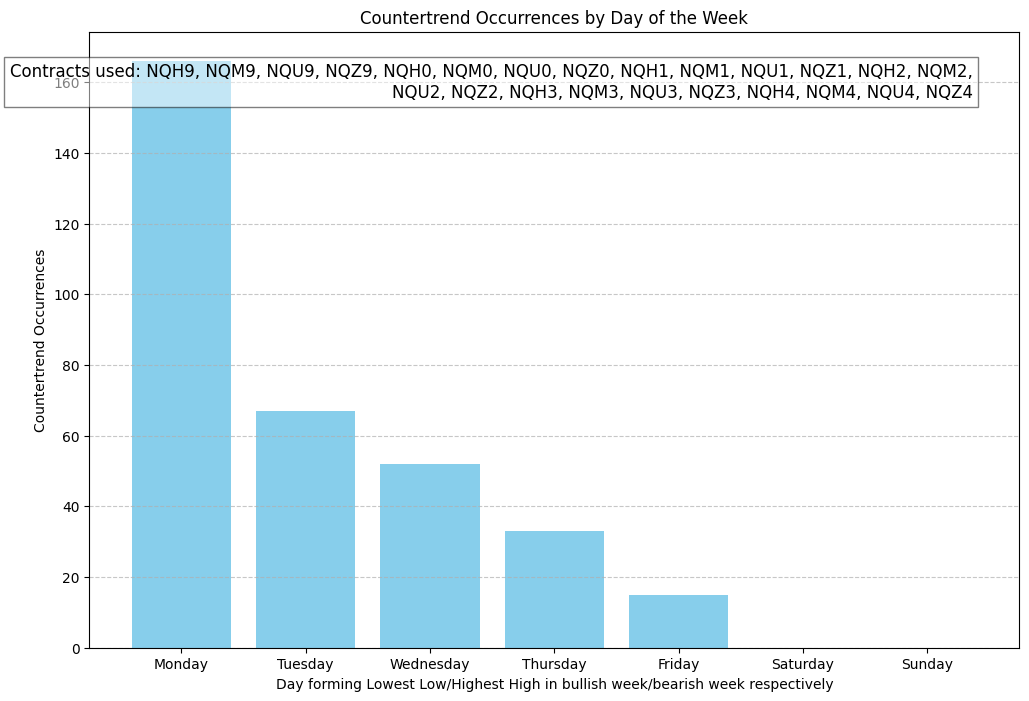

In [109]:
import matplotlib.pyplot as plt
import textwrap


textstr = "Contracts used: " + ", ".join(filtered_symbols)
wrapped_text = "\n".join(textwrap.wrap(textstr, width=100))


plt.figure(figsize=(12, 8))
plt.bar(countertrendHL.keys(), countertrendHL.values(), color='skyblue')
plt.xlabel('Day forming Lowest Low/Highest High in bullish week/bearish week respectively')
plt.ylabel('Countertrend Occurrences')
plt.title('Countertrend Occurrences by Day of the Week')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.text(0.95, 0.95, wrapped_text, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5))

# Display the plot
plt.show()
